In [1]:
from utils import load_dtrajs_from_npz
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='serif')
%matplotlib inline

raw_dtrajs_abl = load_dtrajs_from_npz('abl_11400_2000_t_dtrajs.npz')
raw_dtrajs_src = load_dtrajs_from_npz('src_11401_2000_t_dtrajs.npz')

def trim_dtrajs(dtrajs,length_to_discard=10,min_length=100):
    trimmed = [traj[length_to_discard:] for traj in dtrajs if len(traj)>length_to_discard]
    return trimmed

dtrajs_abl = trim_dtrajs(raw_dtrajs_abl)
dtrajs_src = trim_dtrajs(raw_dtrajs_src)

def create_overlap_matrix(dtrajs):
    overlap_matrix = np.zeros((len(dtrajs),len(dtrajs)))

    sets = [set(traj) for traj in dtrajs]

    for i in range(len(overlap_matrix)):
        for j in range(len(overlap_matrix)):
            overlap_matrix[i,j] = len(sets[i].intersection(sets[j]))
    
    return overlap_matrix

overlap_matrix_abl = create_overlap_matrix(dtrajs_abl)
overlap_matrix_src = create_overlap_matrix(dtrajs_src)

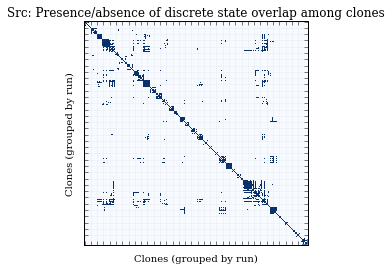

In [2]:
def plot_binary_overlap_matrix(overlap_matrix,name='Abl'):
    plt.imshow(overlap_matrix>0,interpolation='none',cmap='Blues');
    #plt.colorbar()
    plt.xlabel('Clones (grouped by run)')
    plt.ylabel('Clones (grouped by run)')
    plt.title(name+': Presence/absence of discrete state overlap among clones')
    ticks = [20*i for i in range((len(overlap_matrix)+1)/20)]
    labels = ['']*len(ticks)
    plt.xticks(ticks,labels)
    plt.yticks(ticks,labels)
    plt.grid(linestyle='-',color='grey',alpha=0.1)

plot_binary_overlap_matrix(overlap_matrix_abl,'Abl')
plt.savefig('overlap_matrix_abl.jpg',dpi=300)
plt.close()

plot_binary_overlap_matrix(overlap_matrix_src,'Src')
plt.savefig('overlap_matrix_src.jpg',dpi=300)

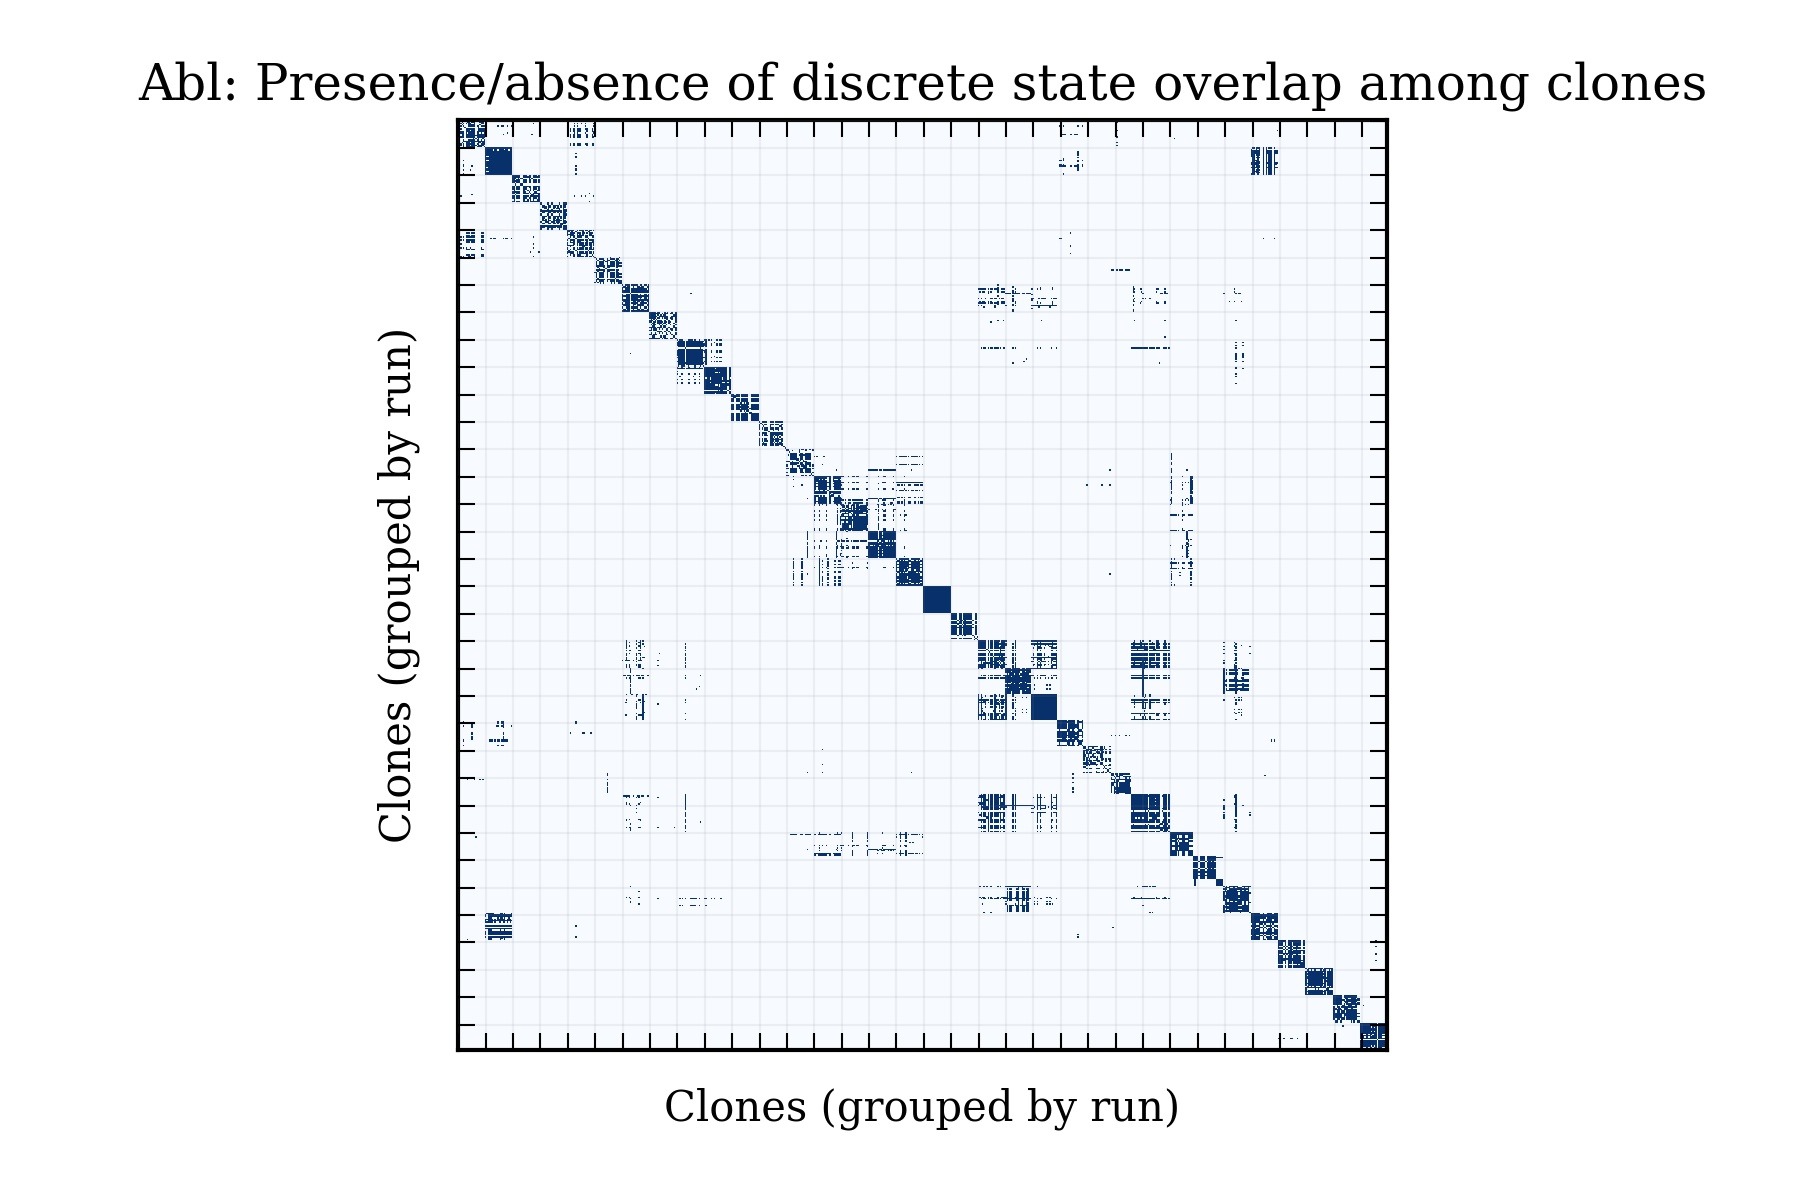

In [3]:
from IPython.display import Image
Image('overlap_matrix_abl.jpg',retina=True)

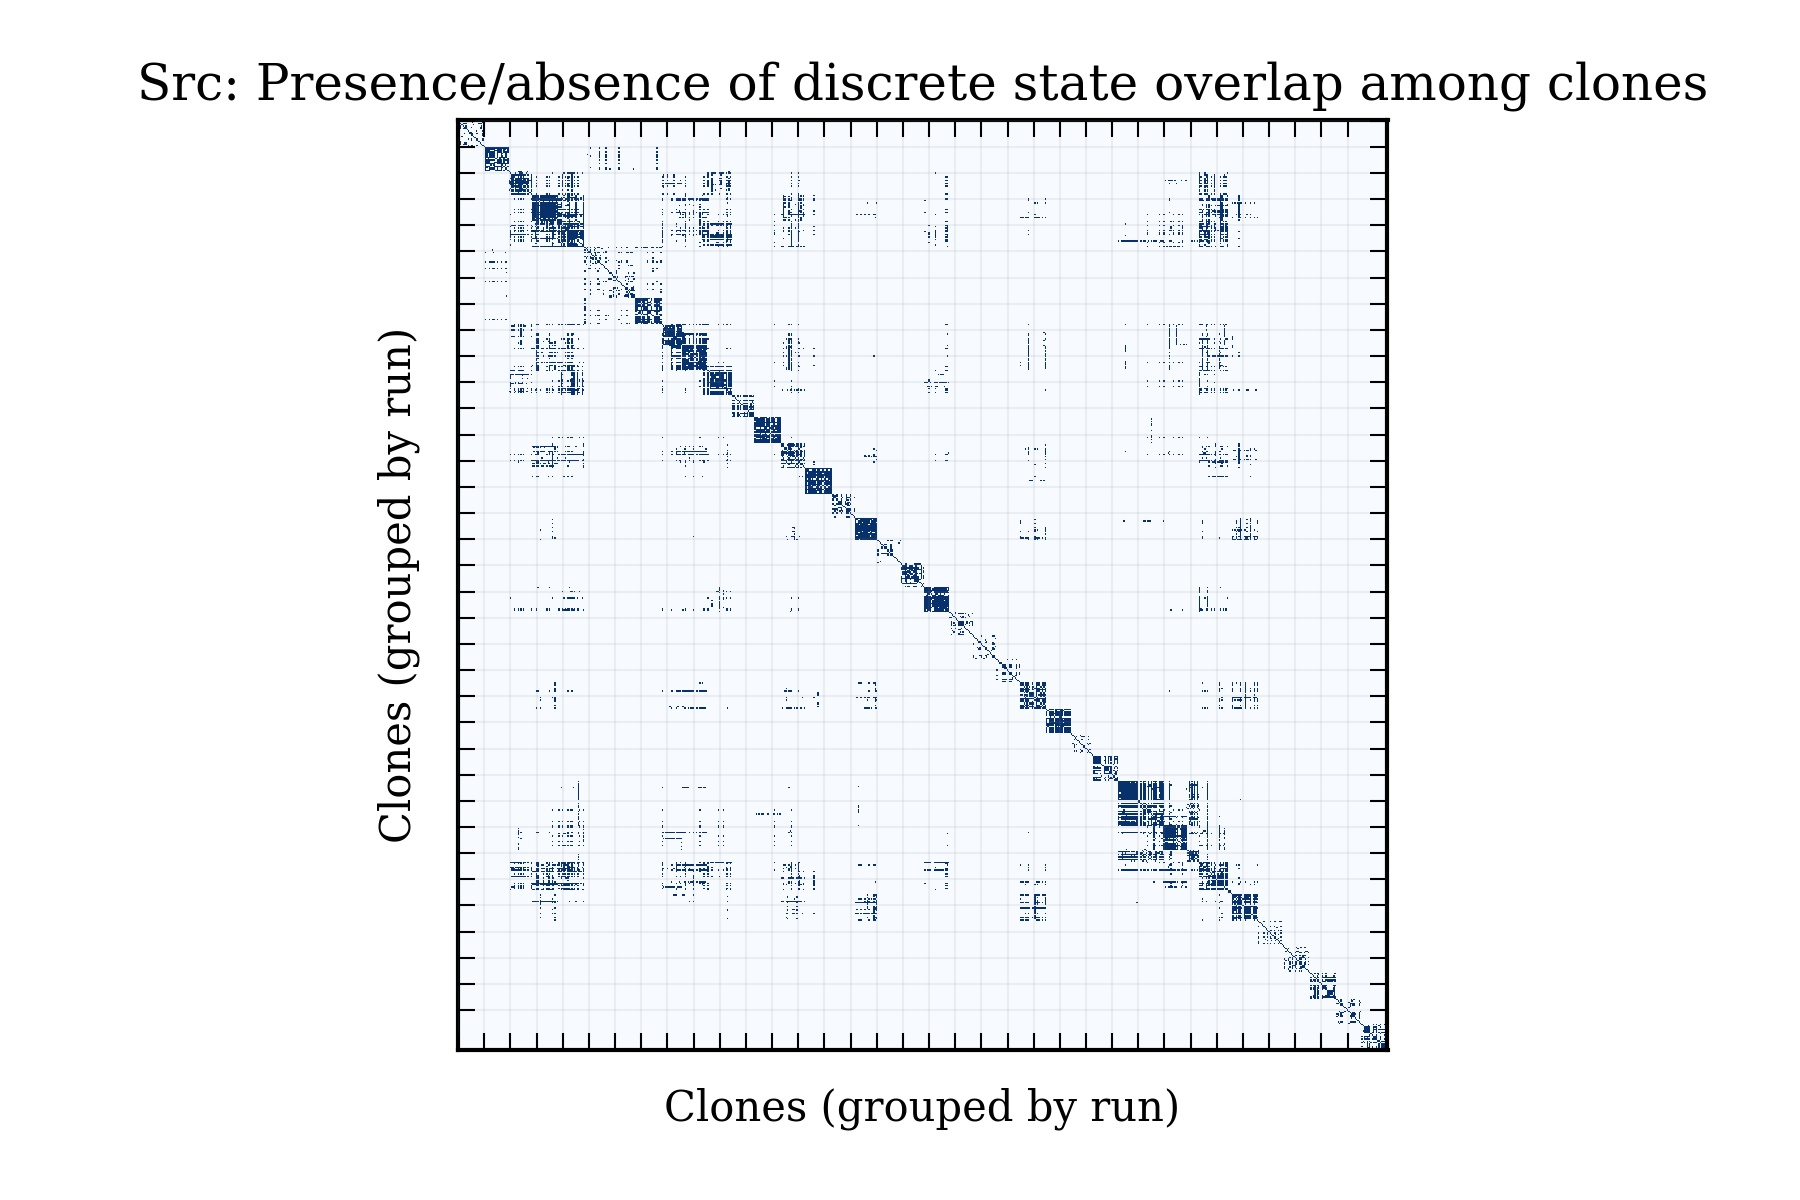

In [4]:
Image('overlap_matrix_src.jpg',retina=True)